# 📁 Boshlanish: Ma’lumotlarni olish

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Rasm saqlanadigan papka
os.makedirs("images", exist_ok=True)

# Ko‘rib chiqiladigan kriptolar
coins = ['BTC-USD', 'ETH-USD', 'SOL-USD']
data = yf.download(coins, start='2020-01-01', end='2024-12-31')['Close']
data.columns = ['Bitcoin', 'Ethereum', 'Solana']

/tmp/ipython-input-2-457675414.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(coins, start='2020-01-01', end='2024-12-31')['Close']
[*********************100%***********************]  3 of 3 completed


# 📈 1. Trend grafigi

<Figure size 1200x600 with 0 Axes>

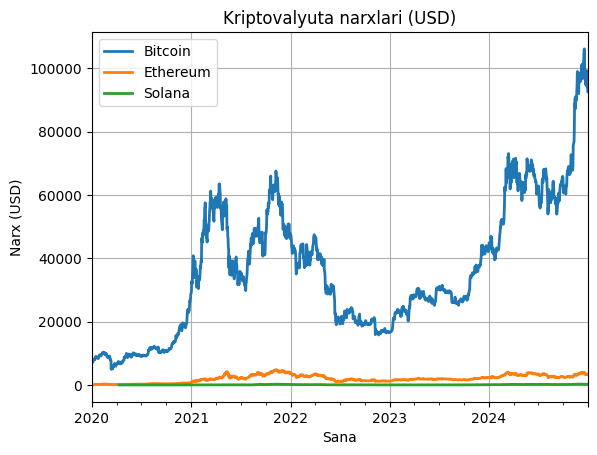

In [3]:
plt.figure(figsize=(12, 6))
data.plot(title="Kriptovalyuta narxlari (USD)", linewidth=2)
plt.xlabel("Sana")
plt.ylabel("Narx (USD)")
plt.grid(True)
plt.savefig("images/trend.png")
plt.show()

# 📊 2. ROI (Foyda foizi)

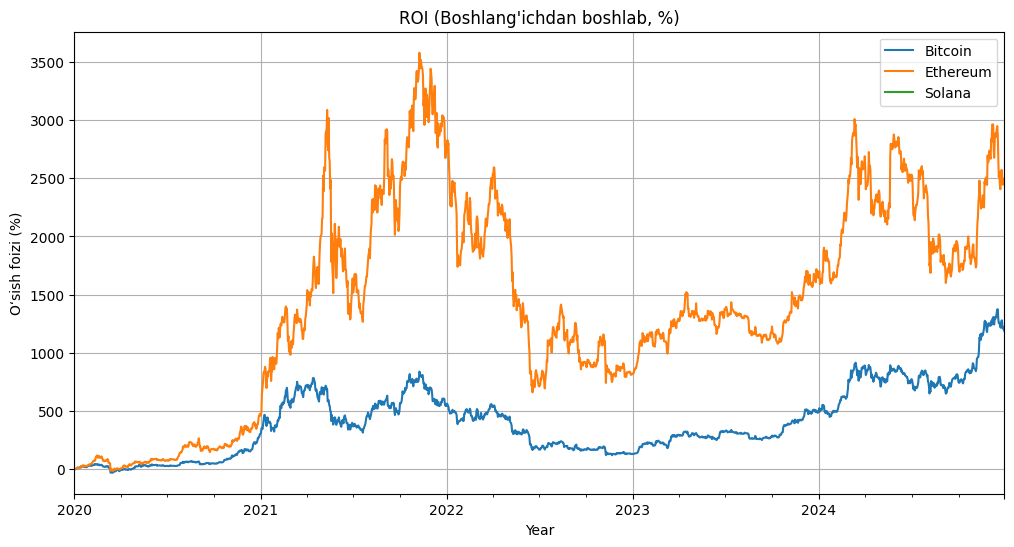

In [5]:
roi = (data / data.iloc[0] - 1) * 100
roi.plot(figsize=(12, 6), title="ROI (Boshlang'ichdan boshlab, %)")
plt.xlabel("Year")
plt.ylabel("O‘sish foizi (%)")
plt.grid(True)
plt.savefig("images/roi.png")
plt.show()

# 📉 3. Volatilite (oylik standart og‘ish)

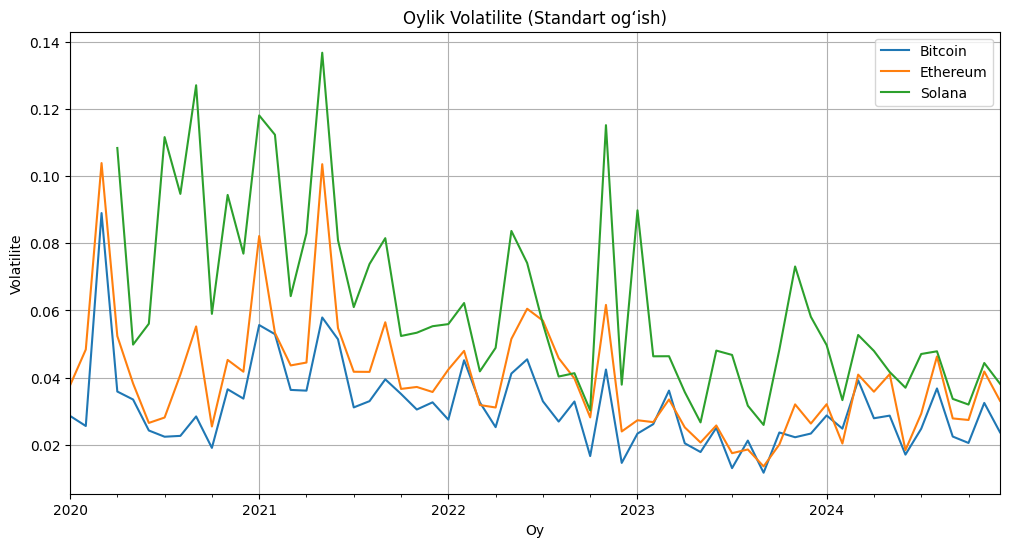

In [6]:
monthly_volatility = data.pct_change().resample('M').std()
monthly_volatility.plot(figsize=(12,6), title="Oylik Volatilite (Standart og‘ish)")
plt.xlabel("Oy")
plt.ylabel("Volatilite")
plt.grid(True)
plt.savefig("images/volatility.png")
plt.show()

# 🔁 4. Korrelyatsiya Heatmap

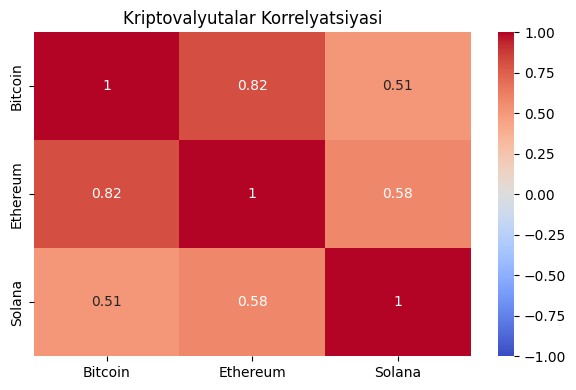

In [7]:
corr = data.pct_change().corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Kriptovalyutalar Korrelyatsiyasi")
plt.tight_layout()
plt.savefig("images/correlation.png")
plt.show()

# 💹 5. Moving Average (30 kunlik)

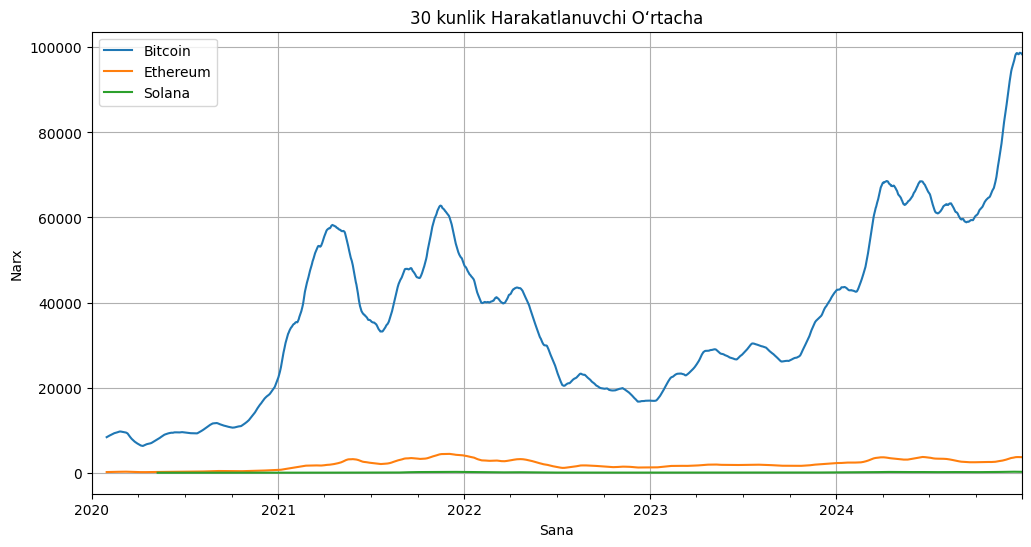

In [8]:
ma = data.rolling(window=30).mean()
ma.plot(figsize=(12,6), title="30 kunlik Harakatlanuvchi O‘rtacha")
plt.xlabel("Sana")
plt.ylabel("Narx")
plt.grid(True)
plt.savefig("images/moving_average.png")
plt.show()